# Mobile Money

In [1]:
# import the necessary libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the dataset into the notebook
data = pd.read_csv('datasets/mm_data.csv')

In [3]:
# preview the loaded dataset
data.sample(5)

,start_time,end_time,hhid,account_num,account_type,weight,district,urban,gender,age,...,v236,v237,v238,v240,v241,v242,v243,v244,v245,v246
636,"Oct 30, 2019 10:15:28 AM","Oct 30, 2019 11:31:55 AM",1319,2,Bank Account,135.28433,District_A,Urban,female,27,...,no,yes,yes,no,yes,no,yes,NaN,no,no
2239,"Nov 7, 2019 10:38:54 AM","Nov 7, 2019 11:52:35 AM",2107,3,VSLA Account,172.01519,District_C,Rural,male,27,...,NaN,yes,yes,no,no,no,yes,NaN,yes,no
1076,"Nov 1, 2019 3:44:57 PM","Nov 1, 2019 4:45:21 PM",1541,1,Mobile Money,458.26047,District_C,Rural,female,36,...,NaN,yes,yes,no,yes,no,yes,NaN,yes,no
924,"Oct 31, 2019 3:18:16 PM","Oct 31, 2019 4:43:55 PM",1458,1,Mobile Money,314.58370,District_C,Rural,female,30,...,NaN,no,no,no,no,no,yes,NaN,no,no
1443,"Nov 2, 2019 4:13:55 PM","Nov 2, 2019 5:27:01 PM",1721,3,VSLA Account,419.68239,District_B,Rural,female,47,...,NaN,yes,yes,no,yes,no,yes,NaN,no,no


In [4]:
# explore the properties and structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_time               2442 non-null   object 
 1   end_time                 2442 non-null   object 
 2   hhid                     2442 non-null   int64  
 3   account_num              2442 non-null   int64  
 4   account_type             2442 non-null   object 
 5   weight                   2442 non-null   float64
 6   district                 2442 non-null   object 
 7   urban                    2442 non-null   object 
 8   gender                   2442 non-null   object 
 9   age                      2442 non-null   int64  
 10  hh_members               2442 non-null   int64  
 11  highest_grade_completed  2235 non-null   object 
 12  mm_account_cancelled     2442 non-null   object 
 13  prefer_cash              2395 non-null   object 
 14  mm_trust                

In [5]:
data.shape

(2442, 29)

In [6]:
data.describe()

,hhid,account_num,weight,age,hh_members
count,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000
mean,1607.075758,1.735053,401.935316,38.515561,4.705979
std,348.479178,0.852877,405.409563,13.184723,1.989618
min,1001.000000,1.000000,14.582491,18.000000,1.000000
25%,1304.250000,1.000000,191.808045,28.000000,3.000000
50%,1615.000000,2.000000,290.637580,36.000000,5.000000
75%,1911.000000,2.000000,458.260470,46.000000,6.000000
max,2205.000000,5.000000,4812.165200,97.000000,18.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

start_time                    0
end_time                      0
hhid                          0
account_num                   0
account_type                  0
weight                        0
district                      0
urban                         0
gender                        0
age                           0
hh_members                    0
highest_grade_completed     207
mm_account_cancelled          0
prefer_cash                  47
mm_trust                    128
mm_account_telco            478
mm_account_telco_main      1431
v234                        594
agent_trust                 808
v236                       1799
v237                        296
v238                        287
v240                        287
v241                        336
v242                        341
v243                        296
v244                       1867
v245                        296
v246                        287
dtype: int64

## Dataset Overview
There are 2442 rows and 29 columns of that in this dataset.<br> It can also be noted that there are no duplicated values but there are null values in most of the columns.

#### Column Description
hhid - Household ID

weight - Sampling Weight

account_num - Account Number

account_type - Type of account

district - District of household

urban - Household location in urban or rural village

gender - Gender

age -Age

hh_members - Number of household members

highest_grade_completed - Highest grade completed

mm_account_cancelled - Has cancelled a mobile money account in the past

prefer_cash - Preference for cash over cashless payment methods

mm_trust - Do you trust mobile money?

mm_account_telco - Please select the providers for which you have a mobile money account

mm_account_telco_main - Which would you consider your main Mobile Money account?

v234 - I understood the terms and conditions when I registered for a mobile money account.

agent_trust - Do you trust mobile money agents?

v236 - Have you ever taken a mobile money loan?

v237 - Have you ever had issues with the network being unavailable for mobile money transactions?

v238 - Before making a transaction are you clear about the fees?

v240 - Has a transaction ever failed to go through?

v241 - Has an agent you’ve dealt with ever not had enough cash or efloat available?

v242 - Do you have a copy of the mobile money terms and conditions?

v243 - Do you understand how and where to complain if you have an issue with mobile money?

v244 - Have you had an issue successfully resolved after making a complaint?

v245 - Do you understand what data mobile money providers collect about you?

v246 - Have you been a victim of fraud?

### Key Issues
- During the survey, participants listed all the different types of financial account that they have registered. The resulting data has a format where there is one observation per account type. Format the data so that there is now one observation per participant.

- Create two dummy variables for whether each participant is: i) financially excluded and ii) digitally financially included. What are the overall rates of financial exclusion and digital financial inclusion for the combined population of these three districts?

  - Financial exclusion is defined as not having registered for any type of financial account including accounts with: Mobile money operators, banks, micro-finance institutions (MFI’s), savings and credit cooperative organisations (SACCO’s) and village savings and loan associations (VSLA’s).

  - Digital financial inclusion is defined as having at least one registered account with a mobile money operator or an online bank account.

- Describe in a few short paragraphs how the mobile money market is divided between the three companies. Include at least one chart or table to illustrate your findings. 

- Is there a difference in the share of customers who have experienced failed mobile money transactions in rural and urban villages? If so, is it statistically significant? Explain your findings including any assumptions and limitations.

- What variables are good predictors that someone will cancel their mobile money account? Discuss what causes a customer to stop using their mobile money account including how strong the evidence is.

## Issue 1
During the survey, participants listed all the different types of financial account that they have registered.<br> The resulting data has a format where there is one observation per account type.<br> Format the data so that there is now one observation per participant.

In [9]:
data = data.drop_duplicates(subset = 'hhid', keep = "last")
data.set_index('hhid', inplace=True)

In [10]:
data.sort_index()
data.head(20)

,start_time,end_time,account_num,account_type,weight,district,urban,gender,age,hh_members,...,v236,v237,v238,v240,v241,v242,v243,v244,v245,v246
hhid,,,,,,,,,,,,,,,,,,,,,
1001,"Oct 28, 2019 11:47:47 AM","Oct 28, 2019 12:53:31 PM",3,VSLA Account,145.94444,District_A,Urban,male,32,1,...,NaN,yes,yes,no,yes,no,yes,NaN,yes,no
1002,"Oct 28, 2019 2:01:04 PM","Oct 28, 2019 2:58:34 PM",2,VSLA Account,122.90667,District_B,Rural,male,32,4,...,NaN,yes,yes,yes,no,no,no,NaN,no,no
1003,"Oct 28, 2019 1:04:22 PM","Oct 28, 2019 2:48:41 PM",2,Bank Account,760.46191,District_A,Urban,male,30,8,...,NaN,no,yes,yes,yes,no,yes,yes,yes,no
1004,"Oct 28, 2019 2:04:02 PM","Oct 28, 2019 3:08:44 PM",3,SACCO Account,433.96402,District_A,Rural,male,68,4,...,NaN,no,no,no,no,no,yes,NaN,no,no
1005,"Oct 28, 2019 8:51:28 AM","Oct 28, 2019 10:11:40 AM",2,VSLA Account,303.04395,District_C,Rural,female,28,2,...,no,yes,yes,yes,yes,no,yes,NaN,no,no
1006,"Oct 28, 2019 10:17:30 AM","Oct 28, 2019 11:27:08 AM",1,VSLA Account,1053.44290,District_B,Rural,female,36,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,"Oct 28, 2019 11:32:54 AM","Oct 28, 2019 1:06:56 PM",1,VSLA Account,259.29567,District_C,Urban,female,66,7,...,NaN,no,yes,no,yes,no,no,NaN,no,no
1008,"Oct 28, 2019 4:09:33 PM","Oct 28, 2019 5:42:56 PM",3,VSLA Account,673.10869,District_B,Rural,male,52,5,...,NaN,yes,no,no,yes,no,no,NaN,no,yes
1009,"Oct 28, 2019 9:33:31 AM","Oct 28, 2019 10:45:35 AM",1,VSLA Account,471.62469,District_C,Rural,female,37,5,...,NaN,yes,yes,yes,no,no,yes,NaN,no,no


## Issue 2
Create two dummy variables for whether each participant is: <br>
i) financially excluded <br> ii) digitally financially included. <br>
What are the overall rates of financial exclusion and digital financial inclusion for the combined population of these three districts?

In [11]:
# create a financial excluded dummy column
def excluded(row):
    if row['account_type'] == 'None':
        return 'yes'
    else:
        return 'no'

data["financial_ex"] = data.apply(excluded, axis=1)

In [12]:
# create a financial included dummy column
def included(row):
    if row['account_type'] != 'None':
        return 'yes'
    else:
        return 'no'

data["financial_inc"] = data.apply(included, axis=1)

In [13]:
# test
data.columns

Index(['start_time', 'end_time', 'account_num', 'account_type', 'weight',
       'district', 'urban', 'gender', 'age', 'hh_members',
       'highest_grade_completed', 'mm_account_cancelled', 'prefer_cash',
       'mm_trust', 'mm_account_telco', 'mm_account_telco_main', 'v234',
       'agent_trust', 'v236', 'v237', 'v238', 'v240', 'v241', 'v242', 'v243',
       'v244', 'v245', 'v246', 'financial_ex', 'financial_inc'],
      dtype='object')

In [14]:
included = data['financial_inc'][data['financial_inc'] == 'yes'].count()
excluded = data['financial_ex'][data['financial_ex'] == 'yes'].count()

print(f'The number of fInancially included participants are {included} while the number of financially  excluded participants are {excluded}')

The number of fInancially included participants are 1073 while the number of financially  excluded participants are 132


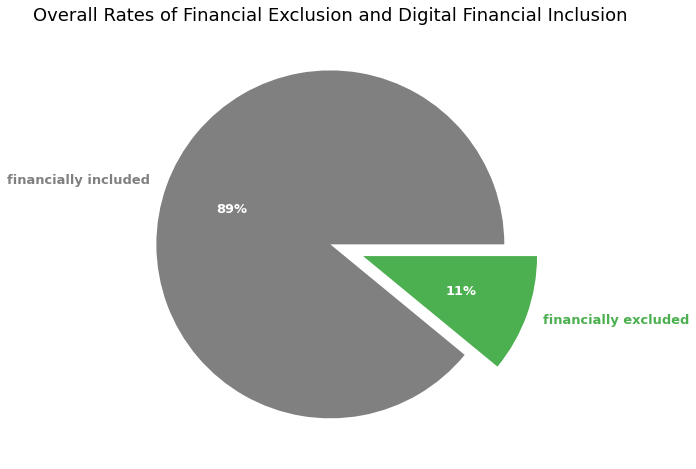

In [23]:
f_rates = data['financial_inc'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
x = f_rates
labels = ['financially included', 'financially excluded']
mycolors = ["grey", "#4CAF50"]
myexplode = [0, 0.2]
patches, texts, pcts = ax.pie(x, labels = labels, autopct='%.f%%', explode = myexplode, colors = mycolors, textprops={'fontsize': 13})
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
plt.title("Overall Rates of Financial Exclusion and Digital Financial Inclusion", fontsize = 18)
plt.show()

The above analysis and graph shows that 89% of the combined population for the three district are financially included. <br>
<sup>(i.e they have at least one registered account with a mobile money operator or an online bank account)</sup> <br> 
On the other hand, 11% of the combined population are financially excluded <br>
<sup>(i.e they haven't registered for any financialy account)</sup>

## Issue 3
Describe in a few short paragraphs how the mobile money market is divided between the three companies. Include at least one chart or table to illustrate your findings

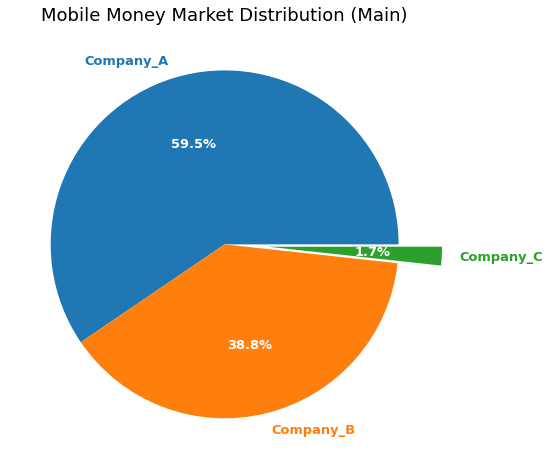

In [ ]:
distribution = data['mm_account_telco_main'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
x = distribution
labels = distribution.keys()
myexplode = [0, 0, 0.25]
patches, texts, pcts = ax.pie(x, labels = labels, autopct='%.1f%%', explode = myexplode, textprops={'fontsize': 13})
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
plt.title("Mobile Money Market Distribution (Main)", fontsize = 18)
plt.show()

Checking the main mobile money account of the participants, Company_A has the highest market share with 59.5% of the total market share while Company_B has the second largest market share with 38.8% and lastly, Company_C has the least market share by a long margin having less than 2% of the total market share. <br>
Since there's data available for participants that make use of more than one mobile money account, it'll be interesting to see how the distribution changes.

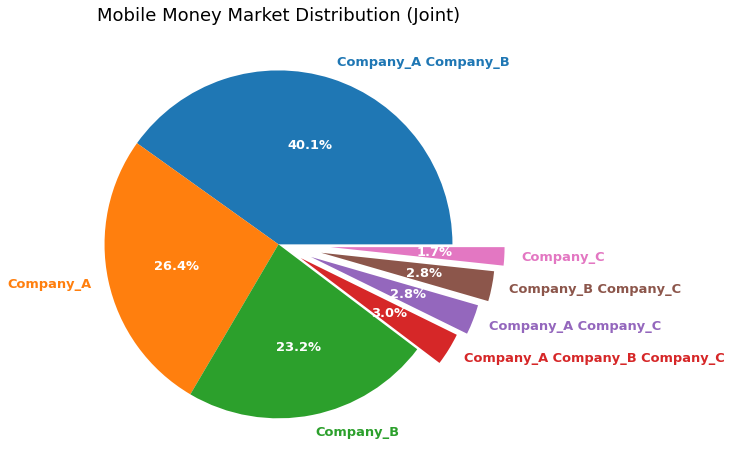

In [25]:
j_distribution = data['mm_account_telco'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
x = j_distribution
labels = j_distribution.keys()
myexplode = [0, 0, 0, 0.15, 0.2, 0.25, 0.3]
patches, texts, pcts = ax.pie(x, labels = labels, autopct='%.1f%%', explode = myexplode, textprops={'fontsize': 13})
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
plt.title("Mobile Money Market Distribution (Joint)", fontsize = 18)
plt.show()

Looking at the joint distribution, it is noted that the individual accounts stil take the same position in terms of distribution but with the addition of multiple accounts there are some slight changes. <br>

Most of the participants make use of both Company_A and Company_B together and this is interesting because no other combination takes up a significant portion of the market share.<br> 

It is also worth noting that the participants that make use of the three Companies have more market share compared to the combination of Company_B and Company_C and the combination of Company_A and Company_C.

## Issue 4
Is there a difference in the share of customers who have experienced failed mobile money transactions in rural and urban villages? If so, is it statistically significant? Explain your findings including any assumptions and limitations.


In [18]:
data['urban'].value_counts()

Rural    940
Urban    265
Name: urban, dtype: int64

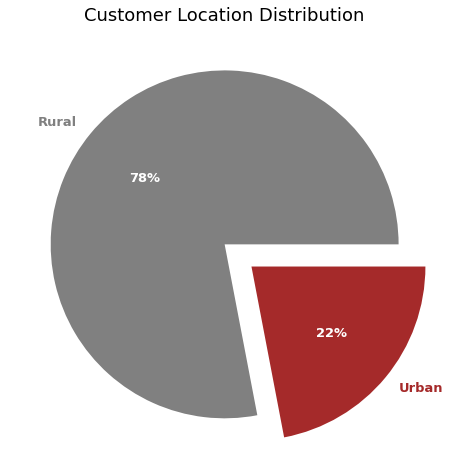

In [30]:
loc = data['urban'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
x = loc
labels = ['Rural', 'Urban']
mycolors = ["grey", "brown"]
myexplode = [0, 0.2]
patches, texts, pcts = ax.pie(x, labels = labels, autopct='%.f%%', explode = myexplode, colors = mycolors, textprops={'fontsize': 13})
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
plt.title("Customer Location Distribution", fontsize = 18)
plt.show()

It is worth noting that most of the participants live in the __rural__ area and this might affect further analysis. <br>
Next, I would be looking at how the "v240" column which represents failed transactions affect the above values.

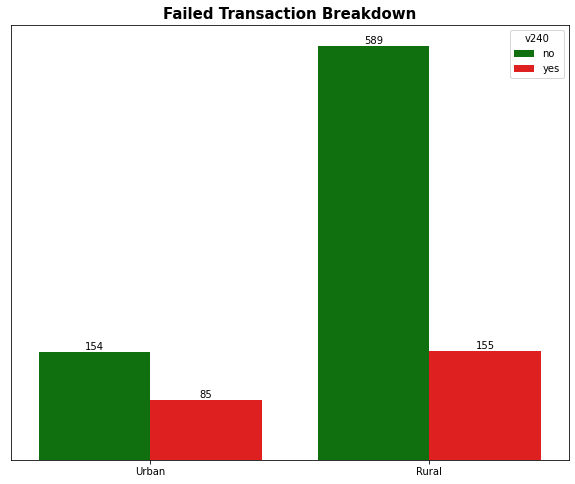

In [31]:
fig, ax = plt.subplots(figsize =(10, 8))
mycolor = ['g', 'r']
sb.countplot(data = data, x = 'urban', hue = 'v240', palette = mycolor)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Failed Transaction Breakdown', fontsize = 15, fontweight='bold')
x_axis = ax.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)
plt.show()

After grouping the location distribution with the failed transactions, it is noticed that the Rural area has a higher number of failed transactions compared to the Urban area but this might be caused by the majority of the participants staying in the Rural area as stated earlier. <br>
The margin between the failed and unfailed transactions in the Rural area is much higher compared to the urban area but this might once again be due to the distribution of participants in each location.

As for the difference in the failed transactions between both locations, the Rural area has more failed transactions but there is not much difference between the both locations.

We can drill down even further by getting the figures for each locations (i.e Rural and Urban) seperately.

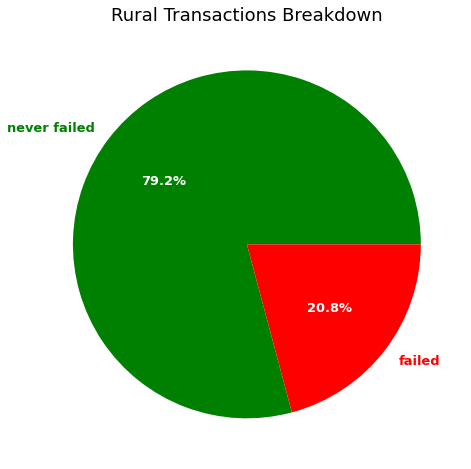

In [27]:

rural_p = data[data["urban"]=='Rural'].v240.value_counts()

fig, ax = plt.subplots(figsize = (10, 8))
x = rural_p
labels = ['never failed', 'failed']
myexplode = [0, 0]
mycolor = ['g', 'r']
patches, texts, pcts = ax.pie(x, labels = labels, autopct='%.1f%%', explode = myexplode, textprops={'fontsize': 13}, colors = mycolor)
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
plt.title("Rural Transactions Breakdown", fontsize = 18)
plt.show()

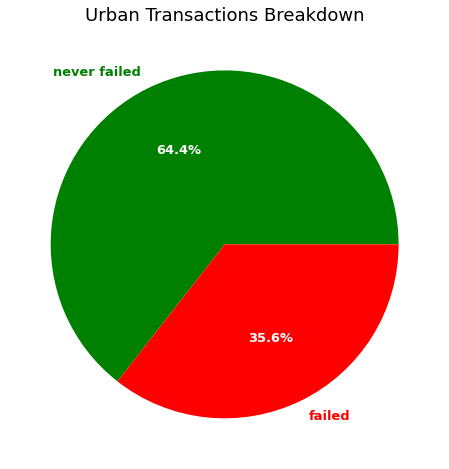

In [28]:
urban_p = data[data["urban"]=='Urban'].v240.value_counts()

fig, ax = plt.subplots(figsize = (10, 8))
x = urban_p
labels = ['never failed', 'failed']
myexplode = [0, 0]
mycolor = ['g', 'r']
patches, texts, pcts = ax.pie(x, labels = labels, autopct='%.1f%%', explode = myexplode, textprops={'fontsize': 13}, colors = mycolor)
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
plt.title("Urban Transactions Breakdown", fontsize = 18)
plt.show()

With further drill down, it is noted that the participants in the Urban location had a higher percentage of failed transactions with 35.6% as compared to the Rural location which had 20.8%.<br>



## Issue 5
What variables are good predictors that someone will cancel their mobile money account? Discuss what causes a customer to stop using their mobile money account including how strong the evidence is.